<a href="https://colab.research.google.com/github/gonzalezzayra/SIMULACION-I/blob/main/Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Juego con monedas**

----



Lanzamos dos monedas y avanzamos en sentido horario, el número de caras que aparezcan. Si repetimos el procedimiento.

¿Son todos los sectores igualmente probables cuando pase mucho tiempo?

La variable de estado es la posición de la ficha

$$\{ \text{verde, rojo, naranja, azul} \}$$

Los posibles estados en las monedas:

$$\text{CC,CX,XC,XX}$$

Cada unas de las probabilidades:

\begin{align*}
\text{La probabilidad de CC es } &\frac{1}{4} \\
\text{La probabilidad de CX es } &\frac{1}{2} \\
\text{La probabilidad de XC es } &\frac{1}{2} \\
\text{La probabilidad de XX es } &\frac{1}{4}
\end{align*}

Denotemos por

$$x_n \text{ a la probabilidad de estar en el sector naranja tras } n \text{ lanzamientos}$$

$$y_n \text{ a la probabilidad de estar en el sector azul tras } n \text{ lanzamientos}$$

$$z_n \text{ a la probabilidad de estar en el sector verde tras } n \text{ lanzamientos}$$

$$t_n \text{ a la probabilidad de estar en el sector rojo tras } n \text{ lanzamientos}$$

Analizamos la situación para $n=1$

$$x_1 = \frac{1}{4} x_0 + 0\cdot y_0 + \frac{1}{4} \cdot z_0 + \frac{2}{4}\cdot t_0 $$

$$y_1 = \frac{2}{4} x_0 + \frac{1}{4}\cdot y_0 + 0 \cdot z_0 + \frac{1}{4}\cdot t_0 $$

$$z_1 = \frac{1}{4} x_0 + \frac{2}{4}\cdot y_0 + \frac{1}{4} \cdot z_0 + 0 \cdot t_0 $$

$$t_1 = 0\cdot x_0 + \frac{1}{4}\cdot y_0 + \frac{2}{4} \cdot z_0 + \frac{1}{4}\cdot t_0 $$

Para $n=2$

$$x_2 = \frac{1}{4} x_1 + 0\cdot y_1 + \frac{1}{4} \cdot z_1 + \frac{2}{4}\cdot t_1 $$

$$y_2 = \frac{2}{4} x_1 + \frac{1}{4}\cdot y_1 + 0 \cdot z_1 + \frac{1}{4}\cdot t_1 $$

$$z_2 = \frac{1}{4} x_1 + \frac{2}{4}\cdot y_1 + \frac{1}{4} \cdot z_1 + 0 \cdot t_1 $$

$$t_2 = 0\cdot x_1 + \frac{1}{4}\cdot y_1 + \frac{2}{4} \cdot z_1 + \frac{1}{4}\cdot t_1 $$

En general:



$$
\begin{pmatrix} X_n \\ Y_n \\ Z_n \\ T_n \end{pmatrix} = \begin{pmatrix} \frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\ \frac{2}{4}& \frac{1}{4} & 0 & \frac{1}{4} \\ \frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0 \\ 0 & \frac{1}{4} & \frac{2}{4} & \frac{1}{4} \end{pmatrix}  \begin{pmatrix} X_{n-1} \\ Y_{n-1} \\ Z_{n-1} \\ T_{n-1} \end{pmatrix}
$$

Simplificando:

$$X_n = A\cdot X_{n-1} = A^2\cdot X_{n-2} = ... = A^n\cdot X_{0}$$

Entonces se tiene que resolver $A^n$

In [140]:
import numpy as np

#Define la matriz de 4x4

matriz_a = np.array([[0.25, 0, 0.25, 0.5],
                     [0.5, 0.25, 0, 0.25],
                     [0.25, 0.5, 0.25, 0],
                     [0, 0.25, 0.5, 0.25]])

res = np.dot(matriz_a, matriz_a)
print(res)

[[0.125 0.25  0.375 0.25 ]
 [0.25  0.125 0.25  0.375]
 [0.375 0.25  0.125 0.25 ]
 [0.25  0.375 0.25  0.125]]


In [147]:
#Para comparar
x = 1000

#Eleva la matriz a la potencia n
matriz_a_potencia_n = np.linalg.matrix_power(matriz_a, x)


print(matriz_a_potencia_n)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [141]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [142]:
#Con diccionarios

#Los sectores del tablero
#sectores: rojo, naranja, azul y verde
#A 0 se le asigna la etiqueta de verde, 1 la de rojo, 2 la de naranja y 3 la de azul
sectores = {0:'verde', 1:'rojo', 2:'naranja', 3:'azul'}

#Necesitamos inicializar las posiciones,este diccionario es diferente
contador = {'verde' :0, 'rojo':0, 'naranja' : 0, 'azul':0}
#Por ejemplo a verde se le asigna el valor de 0, y así con el resto de colores,es por eso que se inicializa

In [143]:
#Fijamos la posición en 0
posicion = 0

#Número de lanzamientos
n = 10000

In [144]:
#Simulamos el lanzamiento de las dos monedas
for _ in range(n):
  contador[sectores[posicion]] += 1 #Aqui el contador es dependiendo de sectores y sectores dependiendo de posicion
  #Es por ello que se hizo el uso de los diccionarios
  moneda_1 = random.choice([0,1]) #0 es cruz, 1 es cara
  moneda_2 = random.choice([0,1])
  #Sumamos lo resultante en las 2 monedas
  caras = moneda_1 + moneda_2 #Por ejemplo, si salen las dos caras si se nos suman 2 a caras
  posicion = (posicion + caras) % 4  #El modulo es para saber en que color se encuentra

In [145]:
probabilidad_verde = contador['verde']/n #dependiendo del numero de veces que caiga se divide entre n
probabilidad_rojo = contador['rojo']/n
probabilidad_naranja = contador['naranja']/n
probabilidad_azul = contador['azul']/n

print("La probabilidad de verde es:", probabilidad_verde)
print("La probabilidad de rojo es:", probabilidad_rojo)
print("La probabilidad de naranja es:", probabilidad_naranja)
print("La probabilidad de azul es:", probabilidad_azul)


probabilidades = [probabilidad_verde, probabilidad_rojo, probabilidad_naranja, probabilidad_azul]
print("Las probabilidades son:", probabilidades)

La probabilidad de verde es: 0.2502
La probabilidad de rojo es: 0.2535
La probabilidad de naranja es: 0.2429
La probabilidad de azul es: 0.2534
Las probabilidades son: [0.2502, 0.2535, 0.2429, 0.2534]


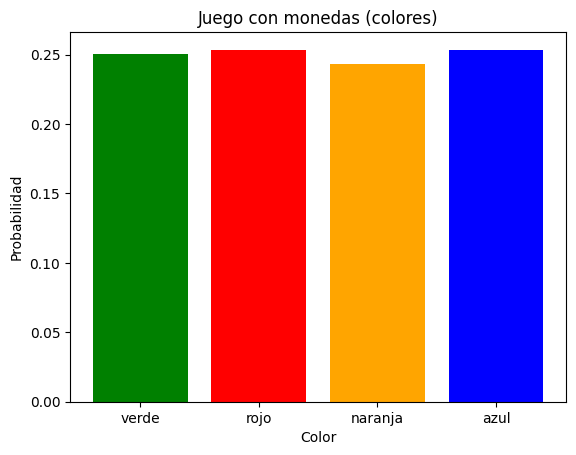

In [146]:
#Gráfica
plt.bar(['verde', 'rojo', 'naranja', 'azul'], probabilidades, color=['green', 'red', 'orange', 'blue'])
plt.title('Juego con monedas (colores)')
plt.xlabel('Color')
plt.ylabel('Probabilidad')
plt.show()